In [2]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
from utils import collect_all_instruments_ids, collect_single_instrument_data
warnings.filterwarnings("ignore")

## Соберем все id-щники и опционы, которым они соответсвуют

In [6]:
# все id-шники
instruments_df = collect_all_instruments_ids()
instruments_df.head(5)

,instrument_name,instrument_id
0,BTC-23OCT22-15000-C,140054
1,BTC-23OCT22-15000-P,140055
2,BTC-23OCT22-16000-C,140056
3,BTC-23OCT22-16000-P,140057
4,BTC-23OCT22-17000-C,140058


## Собираем данные по конкретному опциону

In [4]:
# по конкретному опциону
single_option = collect_single_instrument_data(instrument_id = 140054, number_of_ticks = 100)
single_option.head(5)

2022-10-22 21:06:03.603 | INFO     | utils:call_api:68 - Collected 100 ticks for id = 140054


,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp,strike
0,BTC-23OCT22-15000-C,1666461955380,19148.8979,210.0,0.2167,0.0,0.0,2022-10-22 21:05:55.380000,15000
5,BTC-23OCT22-15000-C,1666461956389,19149.0563,210.0,0.2167,0.0,0.0,2022-10-22 21:05:56.389000,15000
18,BTC-23OCT22-15000-C,1666461957394,19149.3825,210.0,0.2167,0.0,0.0,2022-10-22 21:05:57.394000,15000
31,BTC-23OCT22-15000-C,1666461958399,19149.2187,210.0,0.2167,0.0,0.0,2022-10-22 21:05:58.399000,15000
45,BTC-23OCT22-15000-C,1666461959407,19149.1550,210.0,0.2167,0.0,0.0,2022-10-22 21:05:59.407000,15000


2022-10-23 02:02:00.418 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138432
2022-10-23 02:02:00.822 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138433
2022-10-23 02:02:01.330 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138434
2022-10-23 02:02:01.776 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138435
2022-10-23 02:02:02.183 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138436
2022-10-23 02:02:02.588 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138437
2022-10-23 02:02:02.979 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138438
2022-10-23 02:02:03.380 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138439
2022-10-23 02:02:03.814 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138440
2022-10-23 02:02:04.222 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138441
2022-10-23 02:02:04.633 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 138442

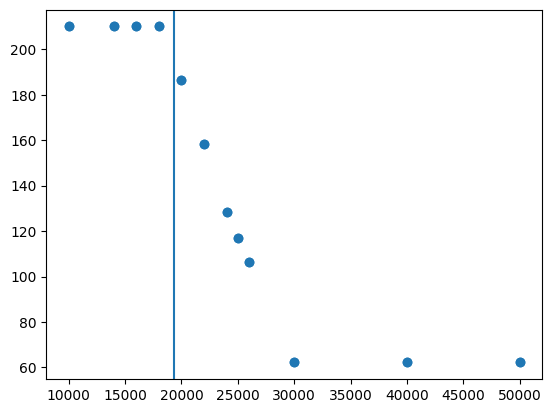

In [50]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
#     (instruments_df["instrument_name"].str.endswith(random_instrument[-1]))
]
single_strike_ids = single_strike.instrument_id.to_list()


options = []
for op_id in single_strike_ids:
    option = collect_single_instrument_data(instrument_id = op_id, number_of_ticks = 1)
    options.append(option)
    
result = pd.DataFrame(columns = option.columns.values)

for option in options:
    result = result.append(option)
    
    
plt.scatter(result["strike"], result["mark_iv"])
plt.axvline(x=result.iloc[0]["underlying_price"])
plt.show()

In [51]:
result.to_pickle("data/colmiled_options.pkl")